# Intro to Deep Learning using Keras

<img src="img/keras.jpg">

## How to use the Keras Deep Learning library

    Keras is a high-level neural networks API, capable of running on top of Tensorflow, Theano, and CNTK. It enables fast experimentation through a high level, user-friendly, modular and extensible API. Keras can also be run on both CPU and GPU. 
    
    In this jupyter-notebook, we will go over the basics of Keras including the two most used Keras models (Sequential and Functional), the core layers as well as some preprocessing functionalities.

## 1. Installing Keras

    I will be telling the steps required to reproduce the above environment - 

    1. Install virtualenv (pip install virtualenv)
    2. Create a virtualenv (python3 -m venv env_name) Only for Linux/MacOS
    3. Activate the virtual environment (source env_name/bin/activate)
    4. Install tensorflow (pip install tensorflow)
    5. Install keras (pip install keras)

In [11]:
# to check whether all the imports are fine or not
# import keras

Using TensorFlow backend.


## 2. Loading in a dataset

    Keras provides seven different datasets, which can be loaded in using Keras directly. These include image datasets as well as a house price and a movie review datasets.

    In this article, we will use the MNIST dataset, which contains 70000 28x28 grayscale images with 10 different classes. Keras splits it in a training set with 60000 instances and a testing set with 10000 instances

In [15]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

    To feed the images to a convolutional neural network we transform the dataframe to four dimensions. This can be done using numpys reshape method. We will also transform the data into floats and normalize it.

In [17]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    We will also transform our labels into a one-hot encoding using the to_categorical method from Keras.

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. Creating a model with the sequential API

    The easiest way of creating a model in Keras is by using the sequential API, which lets you stack one layer after the other. The problem with the sequential API is that it doesn’t allow models to have multiple inputs or outputs, which are needed for some problems.

    Nevertheless, the sequential API is a perfect choice for most problems.

    To create a convolutional neural network we only need to create a Sequential object and use the add function to add layers.

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

    The code above first of creates a Sequential object and adds a few convolutional, maxpooling and dropout layers. It then flattens the output and passes it two a last dense and dropout layer before passing it to our output layer. If you aren’t confident build a convolutional neural network(CNN) check out this great tutorial.

    The sequential API also supports another syntax where the layers are passed to the constructor directly.

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

## 4. Creating a model with the Functional API

    Alternatively, the functional API allows you to create the same models but offers you more flexibility at the cost of simplicity and readability.

    It can be used with multiple input and output layers as well as shared layers, which enables you to build really complex network structures.

    When using the functional API we always need to pass the previous layer to the current layer. It also requires the use of an input layer.

In [22]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

## 5. Compile a model

    Before we can start training our model we need to configure the learning process. For this, we need to specify an optimizer, a loss function and optionally some metrics like accuracy.

    The loss function is a measure on how good our model is at achieving the given objective.

    An optimizer is used to minimize the loss(objective) function by updating the weights using the gradients.

In [23]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

## 6. Augmenting Image data

    Augmentation is a process of creating more data from existing once. For images you can to little transformations like rotating the image, zooming into the image, adding noise and many more.

    This helps to make the model more robust and solves the problem of having not enough data. Keras has a method called ImageDataGenerator which can be used for augmenting images.
    
    This ImageDataGenerator will create new images that have been rotated, zoomed in or out, and shifted in width and height.

In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

## 7. Fit a model

    Now that we defined and compiled our model it’s ready for training. To train a model we would normally use the fit method but because we are using a datagenerator we will use fit_generator and pass it our generator, X data, y data as well as the number of epochs and the batch size. We will also pass it a validation set so we can monitor the loss and accuracy on both sets as well as steps_per_epoch which is required when using a generator and is just set to the length of the training set divided by the batch_size.

In [25]:
epochs = 3
batch_size = 32
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
1875/1875 [==============================] - 171s 91ms/step - loss: 2.3016 - acc: 0.1115 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/3
1875/1875 [==============================] - 160s 86ms/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/3
1875/1875 [==============================] - 178s 95ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135


## 8. Visualizing the training process

    We can visualize our training and testing accuracy and loss for each epoch so we can get intuition about the performance of our model. The accuracy and loss over epochs are saved in the history variable we got whilst training and we will use Matplotlib to visualize this data.

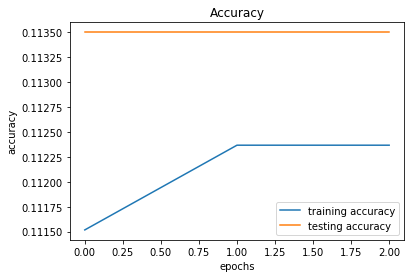

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

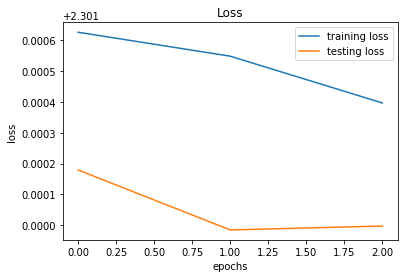

In [30]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

    In the graphs above we can see that our model isn’t overfitting as well as that we could train more epochs because the validation loss is still decreasing.

## 9. Conclusion

    Keras is a high-level neural networks API, capable of running on top of Tensorflow, Theano and CNTK. It enables fast experimentation through a high level, user-friendly, modular and extensible API and as well as running on the CPU and GPU.

    This notebook was the first of a little series going over how Keras works. In it, we went over the installation as well as how to create a simple convolutional neural network.

### If you liked this notebook do reach out to me via linkedIn - [https://www.linkedin.com/in/nthakur20/](https://www.linkedin.com/in/nthakur20/)

### If you have any questions, recommendations or critiques, I can be reached via email-[nandant@gmail.com](nandant@gmail.com)

### Please Follow Me On GitHub - [Nthakur20](https://github.com/NThakur20)